<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Netology_ML_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание

Цель: применить на практике методы по оценке качества данных.

Описание задания:

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

# Этапы работы:

## 1 Получите и загрузите данные.

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns

In [250]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
# 0 PassengerId   категор
# 1 Survived      категор
# 2 Pclass        категор
# 3 Name
# 4 Sex           категор
# 5 Age
# 6 SibSp         категор
# 7 Parch         категор
# 8 Ticket
# 9 Fare
# 10 Cabin
# 11 Embarked     категор

## 2 Удалите все пропущенные значения и категориальные переменные.

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [253]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
# удаляем ячейки с отсутствием данных
data = data[~(data['Age'].isna())]
data = data[~(data['Cabin'].isna())]
data = data[~(data['Embarked'].isna())]

In [255]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [256]:
data1 = data
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [257]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [258]:
df_filter = data1[['Survived','Age','Fare']]
df_filter.head()

,Survived,Age,Fare
1,1,38.0,71.2833
3,1,35.0,53.1000
6,0,54.0,51.8625
10,1,4.0,16.7000
11,1,58.0,26.5500


### Обучите модель.

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [260]:
X = df_filter[df_filter.columns[1:]]
X.head(2)

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000


In [261]:
Y = data['Survived']

In [262]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [263]:
model.fit(X_train, Y_train)

LogisticRegression()

### Выберите и посчитайте метрику качества.

In [264]:
score1_train = model.score(X_train, Y_train)
score1_train

0.6712328767123288

In [265]:
score1_test = model.score(X_test, Y_test)
score1_test

0.7567567567567568

## 3 Снова загрузите полные данные.

In [71]:
data2 = pd.read_csv('train.csv')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4 Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [72]:
df_filter2 = data2[['Survived','Age','Fare']]
df_filter2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### **Обоснование**
Нужны только выделенные признаки, так как они количественные, а остальные категориальные и для модели не нужны. Хотя можно еще преобразовать и добавил пол.

## 5 Проверьте данные на наличие пропущенных значений.

### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [73]:
df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [74]:
df_filter2.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [75]:
# удаляем ячейки с отсутствием данных
df_filter3 = df_filter2[~(df_filter2['Age'].isna())]

In [76]:
df_filter3.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [77]:
df_filter3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [91]:
pass_Survived = (1 - df_filter3['Survived'].sum() / df_filter2['Survived'].sum()) * 100
pass_Age = (1 - df_filter3['Age'].sum() / df_filter2['Age'].sum()) * 100
pass_Fare = (1 - df_filter3['Fare'].sum() / df_filter2['Fare'].sum()) * 100

print('Survived = ', round(pass_Survived, 2), '%')
print('Age = ', round(pass_Age, 2), '%')
print('Fare = ', round(pass_Fare, 2), '%')

Survived =  15.2 %
Age =  0.0 %
Fare =  13.67 %


### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [93]:
data_pass_Surv = df_filter2[['Survived']]
data_pass_Surv.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [94]:
data_pass_Surv['Survived'].unique()

array([0, 1])

In [116]:
[data_pass_Surv.iloc[i,j] for i,j in zip(*np.where(pd.isnull(data_pass_Surv)))]

[]

In [ ]:
# значит пустых значений нет, только нулевые

In [101]:
n_samples = 1
np.random.seed(9)

In [115]:
data_pass_Surv1 = data_pass_Surv.loc[data_pass_Surv['Survived'] == 'Null', 'Survived']
data_pass_Surv1.info()

<class 'pandas.core.series.Series'>
Int64Index: 0 entries
Series name: Survived
Non-Null Count  Dtype
--------------  -----
0 non-null      int64
dtypes: int64(1)
memory usage: 0.0 bytes


In [ ]:
# data_pass_Surv1 = np.random.choice(2, n_samples)
# data_pass_Surv1.info()

In [106]:
data_pass_Fare = df_filter2[['Fare']]
data_pass_Fare.head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


In [107]:
data_pass_Fare['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [117]:
[data_pass_Fare.iloc[i,j] for i,j in zip(*np.where(pd.isnull(data_pass_Fare)))]

[]

In [ ]:
# значит пустых значений нет, только нулевые

In [ ]:
# data_pass_Fare1 = data_pass_Fare.loc[data_pass_Fare['Fare'] == 'NaN', 'Fare'] = np.random.choice(2, n_samples)
# data_pass_Fare1.head()

In [ ]:
#df_filter3.describe(include=['object'])

In [119]:
df_filter3.describe()

,Survived,Age,Fare
count,714.000000,714.000000,714.000000
mean,0.406162,29.699118,34.694514
std,0.491460,14.526497,52.918930
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,8.050000
50%,0.000000,28.000000,15.741700
75%,1.000000,38.000000,33.375000
max,1.000000,80.000000,512.329200


## 6 Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [140]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [158]:
data3 = data2[['Survived','Sex','Age','Fare']]
data3.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [159]:
le.fit(data3['Sex'])

LabelEncoder()

In [160]:
le.transform(['female', 'male'])

array([0, 1])

In [162]:
Sex_transform = pd.Series(data=le.transform(data3['Sex']))
Sex_transform.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

In [163]:
data3.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [125]:
data2['SibSp'].unique() # нельзя преобразовать в 0 и 1, или нужен более сложный подход

array([1, 0, 3, 4, 2, 5, 8])

In [126]:
data2['Parch'].unique() # нельзя преобразовать в 0 и 1, или нужен более сложный подход

array([0, 1, 2, 5, 3, 4, 6])

In [127]:
data2['Pclass'].unique()

array([3, 1, 2])

In [134]:
le.fit(data2['Pclass'])

LabelEncoder()

In [133]:
le.transform(['3', '1', '2'])

array([2, 0, 1])

In [135]:
data2['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [128]:
data2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [150]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [195]:
X1 = pd.get_dummies(data3, columns=['Sex'], drop_first=True)

X1.head()

,Survived,Age,Fare,Sex_male
0,0,22.0,7.2500,1
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,1


## 7 Проверьте данные на наличие выбросов.

### a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [175]:
X1.isna().sum()

Survived      0
Age         177
Fare          0
Sex_male      0
dtype: int64

#### **Обоснование**:
Выбросы есть в категории "возраст", но на мой взгляд удалять их нет смысла.

In [230]:
# удаляем ячейки с отсутствием данных
X1 = X1[~(X1['Age'].isna())]

In [231]:
X1.isna().sum()

Survived    0
Age         0
Fare        0
Sex_male    0
dtype: int64

#### **Поправочка**
Если не удалить выбросы, то потом будет следующая ошибка при обучении

ValueError: Input X contains NaN.

LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 8 *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
corr_matrix = X1.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,Survived,Age,Fare,Sex_male
Survived,1.0,0.0,0.3,-0.5
Age,0.0,1.0,0.0,0.0
Fare,0.3,0.0,1.0,0.0
Sex_male,-0.5,0.0,0.0,1.0


Text(0.5, 1.0, 'Correlation matrix')

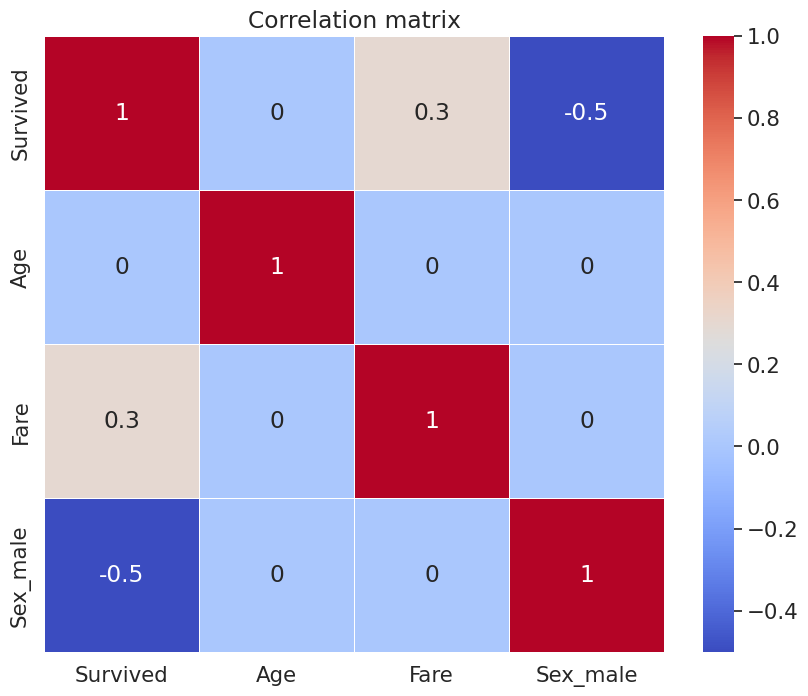

In [233]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

## 9 *Попробуйте математически преобразовать признак Age.

In [173]:
data3['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### **Комментарии**:
Несовсем понятно, что значит "преобразовыать математически".

Можно, например, попробовать разделить возрастные группы на старых и молодых, чтобы сделать категорию 0 и 1 для последующего обучения модели.

## 10 Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [234]:
X2 = X1[['Age','Fare','Sex_male']]
X2.head(2)

,Age,Fare,Sex_male
0,22.0,7.2500,1
1,38.0,71.2833,0


In [235]:
Y2 = X1['Survived']

In [236]:
model2 = LogisticRegression()
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [237]:
model2.fit(X_train2, Y_train2)

LogisticRegression()

In [244]:
score2_train = model2.score(X_train2, Y_train2)
score2_train

0.7775831873905429

In [243]:
score2_test = model2.score(X_test2, Y_test2)
score2_test

0.7902097902097902

## 11 Сформулируйте выводы по проделанной работе.

### a) Кратко опишите какие преобразования были сделаны и почему.

Этап 1:
- сначала выбраны только количественные признаки 'Age','Fare'
- удалены выбросы
- на них была обучена модель
- получены значения качества модели

Этап 2:
- пол преобразован в бинарный класс 'Sex_male'
- выбраны другие количественные признаки 'Age','Fare'
- сделана попытка обучения модели без удаления выбросов, получена ошибка
- удалены выбросы
- обучена новая модель с доп признаком пола в отличие этапа 1
- получены новые значения качества модели

### b) Сравните метрики моделей из п. 2 и п. 10.

In [266]:
score1_train, score1_test

(0.6712328767123288, 0.7567567567567568)

In [247]:
score2_train, score2_test

(0.7775831873905429, 0.7902097902097902)

#### Вывод: вторая модель показала лучшие свойства

### c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Мнение однозначно - обязательно нужно выполнять подобные действия, иначе ошибок не избежать.

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

Инструменты:
- Jupyter Notebook/Google Colab;
- GitHub;
- датасет.

Срок выполнения: дедлайн приема решений на проверку
* Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.